<a href="https://colab.research.google.com/github/matiaspereira3005/Machine-Learning/blob/main/casoSemestral.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#instalar librerias scikit-learn, pandas y seaborn, estas incluyen numpy  matplotlib respectivamente
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import matplotlib.ticker as ticker

##El siguiente codigo es para abrir el dataset desde vscode

In [ ]:
#Instalar openpyxl antes de ejecutar este codigo
df = pd.read_excel("Base_clientes_Monopoly.xlsx",  sheet_name="Transición de Negocio")
df.to_csv("Base_clientes_Monopoly.csv", sep=";")

##El siguiente codigo es para abrir el dataset desde colab

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Base_clientes_Monopoly.csv to Base_clientes_Monopoly.csv


## Fase 1: Business Understanding

Caso Banco “Monopoly/Dormammu”

El banco Monopoly lleva muchos años atendiendo a sus clientes en Chile y recientemente ha sido adquirido por un Banco con capitales extranjeros llamado “Dormammu”. Dormammu ha encargado a sus ingenieros hacer estudios sobre los clientes del banco Monopoly, para conocer su comportamiento y detectar patrones. Además, debe analizar cómo será su estrategia para abordar estos nuevos clientes dado el uso que ellos hacen de sus productos financieros.
Los ingenieros del área informática del banco Monopoly han extraído una base de datos según una solicitud recibida por el nuevo dueño del banco y la han compartido con los ingenieros de Dormammu que están en la sede de New York. La base contiene una muestra de clientes con 12 meses de información almacenada en variables mensuales por cada cliente.

Usted es parte del equipo de ingenieros del banco Dormammu, y con sus colegas debe analizar esta base, limpiarla, seleccionar las variables que sirvan para alguna interpretación y entregar la mayor información posible a los dueños de este banco para que puedan conocer a los clientes, preparar una estrategia y abordar a este nuevo mercado.

La base de datos tiene variables asociadas a información del cliente y variables mensuales, es decir una por cada mes, el cliente no se repite y las variables asociadas se van agregando como una columna más. Con esto, la base de datos tiene 574 variables y 51.124 registros.


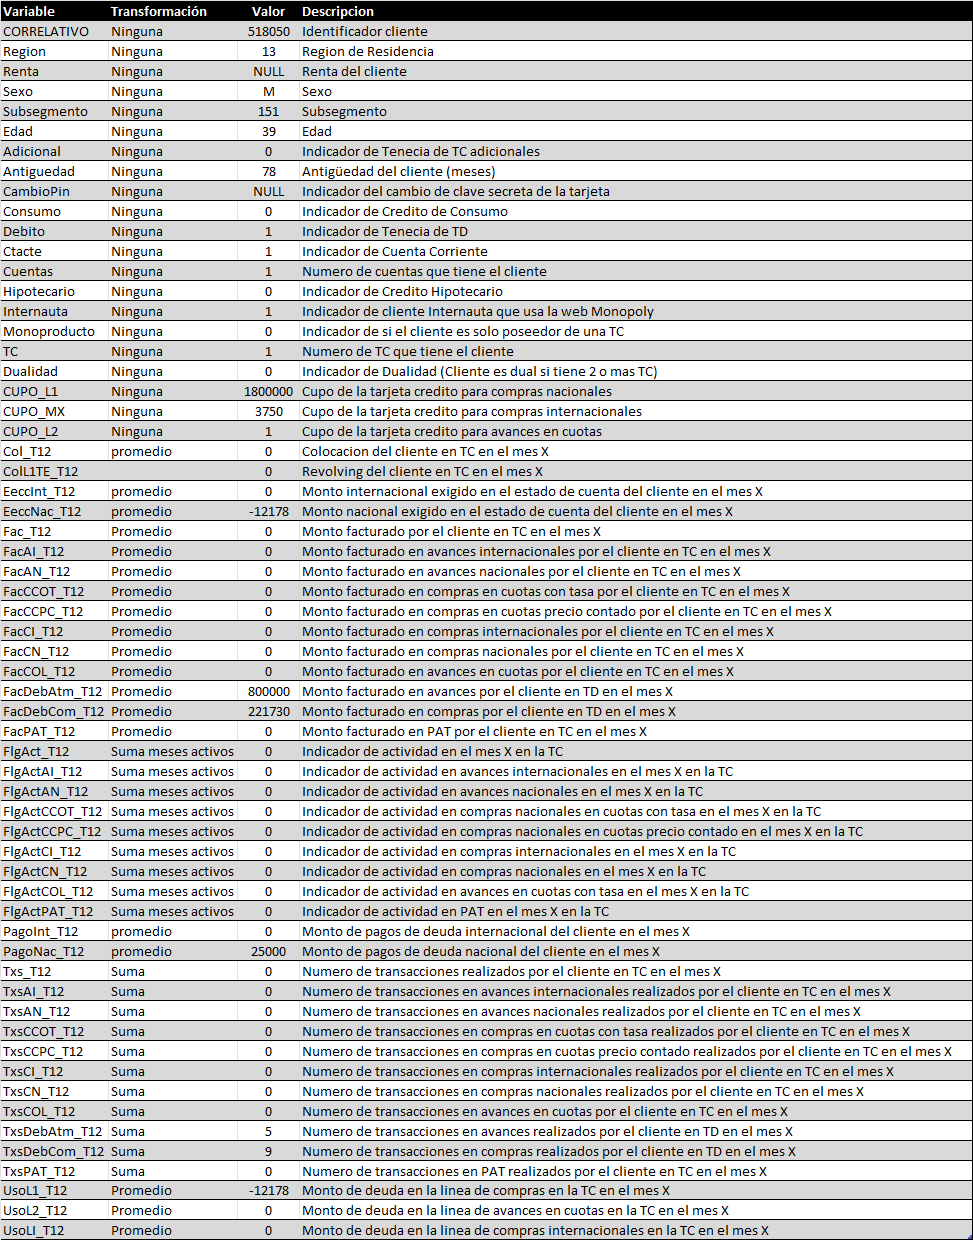

## Fase 2: Data Understanding

In [ ]:
#Se define la cantidad de filas con las que se va a trabajar
df_dormamu=pd.read_csv("Base_clientes_Monopoly.csv",
                       sep=";",
                       skiprows=1,
                       nrows=5000)

In [ ]:
print(df_dormamu.columns)

Index(['0', 'Id', 'Subsegmento', 'Sexo', 'Region', 'Edad', 'Renta',
       'Antiguedad', 'Internauta', 'Adicional',
       ...
       'PagoNac_T01', 'PagoInt_T01', 'EeccNac_T01', 'EeccInt_T01', 'UsoL1_T01',
       'UsoL2_T01', 'UsoLI_T01', 'IndRev_T01', 'target', 'Unnamed: 575'],
      dtype='object', length=576)


### Se trabaja con 5000 filas y se limpian las columnas que no serán utilizadas

In [ ]:
df_dormamu.drop(["0", "Id","Unnamed: 575",'Subsegmento','Region','Antiguedad','Adicional','Dualidad','Monoproducto','Ctacte','Consumo','Hipotecario','Debito','CambioPin','Cuentas','TC'], axis=1, inplace=True)
df_dormamu.drop(0)

,Sexo,Edad,Renta,Internauta,CUPO_L1,CUPO_L2,CUPO_MX,FlgAct_T12,FlgActCN_T12,FlgActCI_T12,...,ColMx_T01,PagoNac_T01,PagoInt_T01,EeccNac_T01,EeccInt_T01,UsoL1_T01,UsoL2_T01,UsoLI_T01,IndRev_T01,target
1,H,46,143640.0,1,750000,150000.0,1000,1.0,1.0,0.0,...,0.0,300000,0.0,214592,0.0,214592.00,83596,0.0,R,0
2,H,45,929106.0,1,1350000,200000.0,1500,1.0,1.0,0.0,...,0.0,216676,0.0,0,0.0,7400.00,0,0.0,T,0
3,H,46,172447.0,0,1570800,220001.0,0,1.0,1.0,0.0,...,0.0,60000,0.0,272762,0.0,272762.00,10591,0.0,R,0
4,H,46,805250.0,0,2762000,2.0,6430,1.0,1.0,0.0,...,0.0,272925,0.0,249562,0.0,75339.00,377782,0.0,R,0
5,H,47,707664.0,1,1312500,450000.0,714,1.0,1.0,0.0,...,0.0,35800,0.0,35800,0.0,0.00,51197,0.0,R,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,H,42,NaN,0,1320000,264000.0,2165,1.0,0.0,0.0,...,0.0,0,0.0,1036155,0.0,1036155.00,0,0.0,R,1
4996,H,43,521006.0,0,400000,2320000.0,400,1.0,1.0,0.0,...,0.0,271000,0.0,307766,0.0,307766.00,1473985,0.0,R,1
4997,H,42,630105.0,1,1670920,420001.0,0,0.0,0.0,0.0,...,0.0,23212,0.0,6302,0.0,6302.00,45500,0.0,P,0
4998,H,42,372475.0,1,900000,120000.0,1000,1.0,1.0,0.0,...,0.0,322122,0.0,148340,0.0,158340.00,120988,0.0,T,0


In [ ]:
df_dormamu.head()

,0,Id,Subsegmento,Sexo,Region,Edad,Renta,Antiguedad,Internauta,Adicional,...,PagoNac_T01,PagoInt_T01,EeccNac_T01,EeccInt_T01,UsoL1_T01,UsoL2_T01,UsoLI_T01,IndRev_T01,target,Unnamed: 575
0,1,1,160,M,13.0,43,NaN,130,1,1,...,33000,0.0,1099866,0.0,1099866.0,15080,0.0,R,0,NaN
1,2,2,160,H,13.0,46,143640.0,69,1,0,...,300000,0.0,214592,0.0,214592.0,83596,0.0,R,0,NaN
2,3,3,170,H,13.0,45,929106.0,24,1,1,...,216676,0.0,0,0.0,7400.0,0,0.0,T,0,NaN
3,4,4,151,H,13.0,46,172447.0,134,0,1,...,60000,0.0,272762,0.0,272762.0,10591,0.0,R,0,NaN
4,5,5,170,H,13.0,46,805250.0,116,0,1,...,272925,0.0,249562,0.0,75339.0,377782,0.0,R,0,NaN


In [ ]:
df_dormamu.describe()

,Edad,Renta,Internauta,CUPO_L1,CUPO_L2,CUPO_MX,FlgAct_T12,FlgActCN_T12,FlgActCI_T12,FlgActAN_T12,...,ColL2CC_T01,ColMx_T01,PagoNac_T01,PagoInt_T01,EeccNac_T01,EeccInt_T01,UsoL1_T01,UsoL2_T01,UsoLI_T01,target
count,5000.00000,4.307000e+03,5000.000000,5.000000e+03,5.000000e+03,5000.000000,4413.000000,4413.000000,4413.000000,4413.000000,...,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5000.000000,5.000000e+03,5.000000e+03,5000.000000,5000.000000
mean,42.43920,7.167423e+05,0.617000,1.356483e+06,4.115246e+05,1660.775800,0.666440,0.582370,0.034670,0.018128,...,4.546185e+04,5.623969e+03,9.076386e+04,2.231875e+03,2.551713e+05,7.947942,2.447792e+05,1.446433e+05,8.664426,0.107000
std,5.42872,4.184525e+05,0.486167,1.016416e+06,8.498582e+05,1533.761504,0.471538,0.493224,0.182964,0.133430,...,1.073974e+05,5.483811e+04,2.019469e+05,6.208969e+04,3.316895e+05,155.140137,3.337208e+05,4.672663e+05,150.358337,0.309144
min,25.00000,1.000000e+00,0.000000,1.000000e+05,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-6.952240e+05,-7676.000000,-6.952240e+05,0.000000e+00,-7637.700000,0.000000
25%,40.00000,4.510220e+05,0.000000,6.000000e+05,4.000000e+04,650.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,7.000000e+03,0.000000e+00,4.136625e+04,0.000000,2.732150e+04,0.000000e+00,0.000000,0.000000
50%,44.00000,6.210000e+05,1.000000,1.082000e+06,1.210000e+05,1200.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,3.745650e+04,0.000000e+00,1.342895e+05,0.000000,1.191375e+05,2.646900e+04,0.000000,0.000000
75%,46.00000,8.959050e+05,1.000000,1.800000e+06,3.000000e+05,2110.000000,1.000000,1.000000,0.000000,0.000000,...,4.278975e+04,0.000000e+00,1.042352e+05,0.000000e+00,3.581232e+05,0.000000,3.466512e+05,1.117885e+05,0.000000,0.000000
max,87.00000,5.404920e+06,1.000000,1.334000e+07,1.200000e+07,24000.000000,1.000000,1.000000,1.000000,1.000000,...,1.522362e+06,1.651435e+06,8.697782e+06,4.056167e+06,3.170699e+06,3910.830000,3.018496e+06,6.929487e+06,3130.920000,1.000000


---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

#### Revisar el monto promedio facturado en avances y compras por mes de los cliente


1. Primero se trabaja con los datos de la facturación por avance

In [ ]:
FacxAvance = [col for col in df_dormamu.columns if col.startswith('FacDebAtm')]
MeanxCol = df_dormamu[FacxAvance].mean()
MeanxCol = MeanxCol.round()
ColSort = sorted(FacxAvance, key=lambda x: int(x.split('_')[1][1:]))
MeanSort = MeanxCol[ColSort]

print(MeanSort)

FacDebAtm_T01    244980.0
FacDebAtm_T02    261358.0
FacDebAtm_T03    244102.0
FacDebAtm_T04    281209.0
FacDebAtm_T05    263121.0
FacDebAtm_T06    271201.0
FacDebAtm_T07    294306.0
FacDebAtm_T08    240418.0
FacDebAtm_T09    246073.0
FacDebAtm_T10    245488.0
FacDebAtm_T11    233740.0
FacDebAtm_T12    239465.0
dtype: float64


In [ ]:
#Reemplaza nulos con KNN
from sklearn.impute import KNNImputer

FacxAva = [col for col in df_dormamu.columns if col.startswith('FacDebAtm')]
knn_imputer = KNNImputer(n_neighbors=5)

df_dormamu[FacxAva] = knn_imputer.fit_transform(df_dormamu[FacxAva])

In [ ]:
#Reemplaza por el promedio
FacxAva = [col for col in df_dormamu.columns if col.startswith('FacDebAtm')]
MeanxCol = df_dormamu[FacxAva].mean()
MeanxCol = MeanxCol.round()

for columna in FacxAva:
    df_dormamu[columna].fillna(MeanxCol[columna], inplace=True)

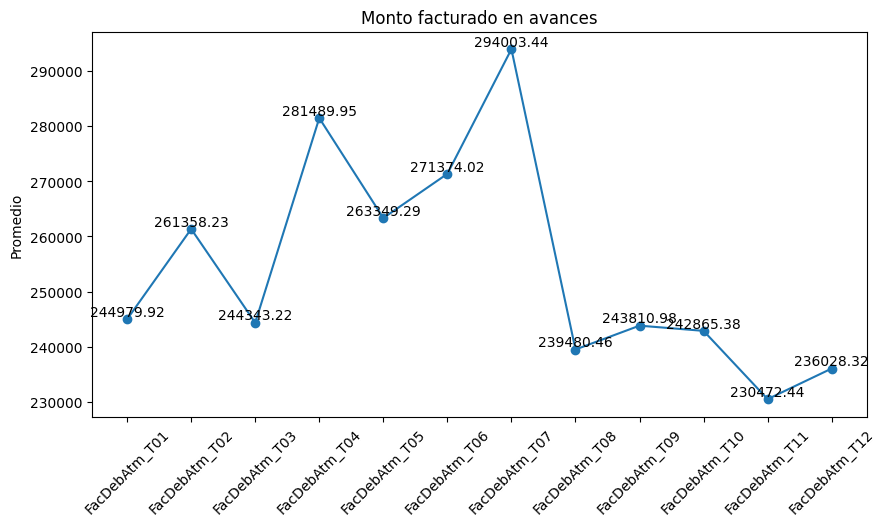

In [ ]:
columnas = ['FacDebAtm_T01','FacDebAtm_T02','FacDebAtm_T03','FacDebAtm_T04','FacDebAtm_T05','FacDebAtm_T06',
            'FacDebAtm_T07','FacDebAtm_T08','FacDebAtm_T09','FacDebAtm_T10','FacDebAtm_T11','FacDebAtm_T12']

MeanxRet = df_dormamu[columnas].mean()
SortCol = sorted(columnas, key=lambda x: int(x.split('_')[1][1:]))
MeanSort = MeanxRet[SortCol]
CantCol = range(len(columnas))

plt.figure(figsize=(10, 5))
plt.plot(CantCol, MeanSort, marker='o', linestyle='-')
plt.ylabel('Promedio')
plt.title('Monto facturado en avances')
plt.xticks(CantCol, SortCol, rotation=45)
for i, valor in enumerate(MeanSort):
    plt.text(i, valor, f'{valor:.2f}', ha='center', va='bottom')

plt.show()

# Hipótesis 1: El análisis de la tendencia promedio de los cargos por adelantado durante 12 períodos (FacDebAtm_T01 a FacDebAtm_T12) revela patrones estacionales o crecientes en los cargos por adelantado a lo largo del año.

2. Luego se trabaja con los datos de la facturación por compras

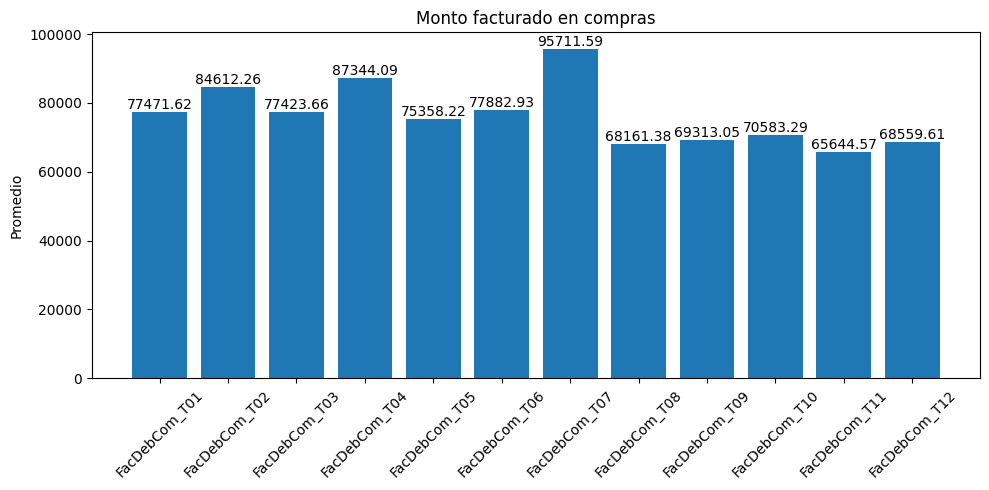

In [ ]:
columnas = ['FacDebCom_T01','FacDebCom_T02','FacDebCom_T03','FacDebCom_T04','FacDebCom_T05','FacDebCom_T06',
            'FacDebCom_T07','FacDebCom_T08','FacDebCom_T09','FacDebCom_T10','FacDebCom_T11','FacDebCom_T12']

MeanxRet = df_dormamu[columnas].mean()
SortCol = sorted(columnas, key=lambda x: int(x.split('_')[1][1:]))
MeanSort = MeanxRet[SortCol]
CantCol = range(len(columnas))

plt.figure(figsize=(10, 5))
bars = plt.bar(CantCol, MeanSort)
plt.ylabel('Promedio')
plt.title('Monto facturado en compras')
plt.xticks(CantCol, SortCol, rotation=45)
plt.tight_layout()
for bar, valor in zip(bars, MeanSort):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{valor:.2f}', ha='center', va='bottom')
plt.show()

# Hipótesis 2: El análisis de la tendencia promedio en el monto cobrado por compras con tarjeta de débito cada mes (FacDebCom_T01 a FacDebCom_T12) reflejará patrones estacionales y de gasto durante diferentes meses del año, que pueden verse influenciados por factores como días festivos, eventos promocionales y patrones de gasto de los clientes. aparente.

Se utilizaron las variables "monto promedio facturado en avances y compras por mes de los clientes" para ver cómo cambia con el tiempo el monto promedio que gasta un cliente en pagos anticipados.
Este gráfico le permitirá ver cómo cambia el gasto promedio de su cliente en vistas previas y compras a lo largo del mes, y si hay patrones estacionales o tendencias a lo largo del tiempo.

---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

3. Se revisan las medidas de tendencia central sobre la renta

In [ ]:
df_dormamu['Renta'].describe().round()


count       4307.0
mean      716742.0
std       418453.0
min            1.0
25%       451022.0
50%       621000.0
75%       895905.0
max      5404920.0
Name: Renta, dtype: float64

### Tratamiento de datos sobre Renta con las columnas CUPO_L1, CUPO_L2 Y CUPO_MX

In [ ]:
#Imputación de datos faltantes por regresión
no_faltantes = df_dormamu[df_dormamu['Renta'].notna()]
faltantes = df_dormamu[df_dormamu['Renta'].isna()]

modelo_regresion = LinearRegression()

modelo_regresion.fit(no_faltantes[['CUPO_L1']], no_faltantes['Renta'])
predicciones = modelo_regresion.predict(faltantes[['CUPO_L1']])
df_dormamu.loc[df_dormamu['Renta'].isna(), 'Renta'] = predicciones


3.1 Se revisan las medidas despues de tratar los datos

In [ ]:
df_dormamu['Renta'].describe().round()

count       5000.0
mean      722421.0
std       391608.0
min            1.0
25%       474436.0
50%       660002.0
75%       873933.0
max      5404920.0
Name: Renta, dtype: float64

### Tratamiento de datos atípicos y missing

Separación de datos: primero, el conjunto de datos se divide en dos conjuntos. Uno es el valor conocido de "Renta" (no faltantes) y el otro es el valor desconocido (faltantes).

Modelo de regresión: se utiliza un modelo de regresión lineal (en este caso, LinearRegression) para predecir los valores faltantes para Income en función de otras características. Este modelo se ajusta a los datos conocidos (no faltantes) de "Renta" y utiliza las características "CUPO_L1", "CUPO_L2" y "CUPO_MX" como predictores.

Identificar datos atípicos: utilice métodos estadísticos o visualización para identificar datos atípicos en columnas relevantes como Rent, CUPO_L1, CUPO_L2, CUPO_MX.

### Uso de estadísticas de tendencia central y dispersión para explicar
Técnicas normalización y estandarización según la distribución de datos

4. Se revisan las medidas de tendencia central sobre la edad

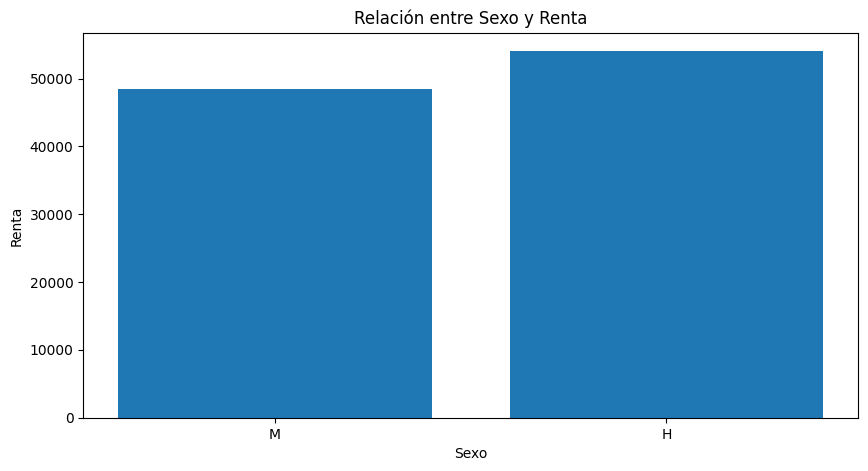

In [ ]:
plt.figure(figsize=(10, 5))
plt.bar(x=df_dormamu["Sexo"], height=df_dormamu["Renta"]*0.01)
plt.xlabel('Sexo')
plt.ylabel('Renta')
plt.title('Relación entre Sexo y Renta')
plt.show()
